In [62]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv("../Dataset/Perth_housing_price.csv")
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33647,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33648,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,2015.0,9600,Stirling Station,4600,02-2017,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33649,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,2016.0,9600,Stirling Station,4600,02-2017,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33650,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33652 entries, 0 to 33651
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33652 non-null  object 
 1   SUBURB            33652 non-null  object 
 2   PRICE             33652 non-null  int64  
 3   BEDROOMS          33652 non-null  int64  
 4   BATHROOMS         33652 non-null  int64  
 5   GARAGE            31176 non-null  float64
 6   LAND_AREA         33652 non-null  int64  
 7   FLOOR_AREA        33652 non-null  int64  
 8   BUILD_YEAR        31528 non-null  float64
 9   CBD_DIST          33652 non-null  int64  
 10  NEAREST_STN       33652 non-null  object 
 11  NEAREST_STN_DIST  33652 non-null  int64  
 12  DATE_SOLD         33652 non-null  object 
 13  POSTCODE          33652 non-null  int64  
 14  LATITUDE          33652 non-null  float64
 15  LONGITUDE         33652 non-null  float64
 16  NEAREST_SCH       33652 non-null  object

In [127]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365200e+04,33652.000000,33652.000000,31176.000000,33652.000000,33652.000000,31528.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,33652.000000,22700.000000
mean,6.370783e+05,3.659188,1.823161,2.199994,2738.077380,183.509806,1989.857682,19778.596072,4523.552567,6089.427939,-31.960668,115.879269,1.815214,72.679780
std,3.558340e+05,0.751969,0.587393,1.365235,16686.734877,72.102148,20.960127,11364.454050,4495.293943,62.167089,0.177788,0.118140,1.746058,40.639054
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1865.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.750000,130.000000,1979.000000,11200.000000,1800.000000,6050.000000,-32.068457,115.789763,0.880568,39.000000
50%,5.352500e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854207,1.345473,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,223.000000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843812,115.970732,2.097167,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2022.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [128]:
# seperate month/year columns 
df["YEAR_SOLD"] = df["DATE_SOLD"].str.extract(r"(\d{4})").astype(float)
df["MONTH_SOLD"] = (df["DATE_SOLD"].str.extract(r"(\d{2})")).astype(float)

# calculate the price/land to understand the distribution of data
df["Price/land"] = df["PRICE"]/df["LAND_AREA"]
df["Land/Floor"] = df["LAND_AREA"]/df["FLOOR_AREA"]

df = df.drop(columns = "DATE_SOLD")
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD,Price/land,Land/Floor
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,2018.0,9.0,941.666667,3.750000
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2019.0,2.0,1039.886040,2.525180
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,2015.0,6.0,399.165508,8.360465
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,2018.0,7.0,391.705069,11.033898
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,2016.0,11.0,697.424893,3.557252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33647,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,...,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0,2016.0,3.0,3561.643836,1.191837
33648,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,2015.0,9600,...,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0,2017.0,2.0,1798.245614,2.000000
33649,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,2016.0,9600,...,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0,2017.0,2.0,1636.015326,2.330357
33650,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,...,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN,2016.0,10.0,645.514223,5.376471


No handles with labels found to put in legend.


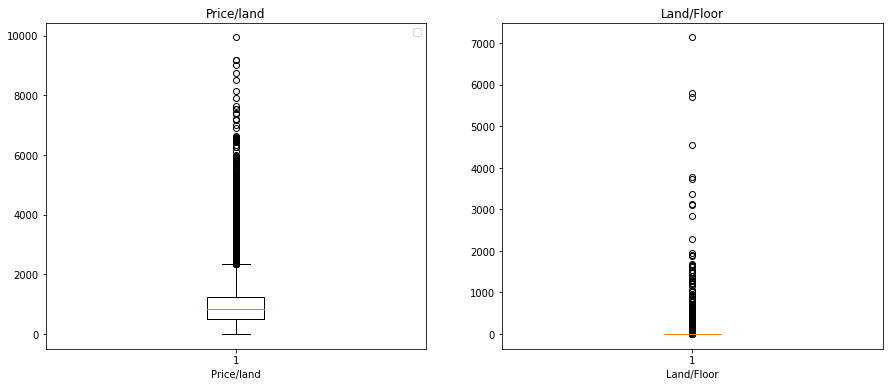

In [129]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].boxplot(df["Price/land"])
ax[0].set_xlabel('Price/land')
ax[0].set_title('Price/land')
ax[0].legend()

ax[1].boxplot(df["Land/Floor"])
ax[1].set_xlabel('Land/Floor')
ax[1].set_title('Land/Floor')
# ax[1].plot([min_value,max_value], [min_value,max_value], color = "black")
plt.show()

No handles with labels found to put in legend.


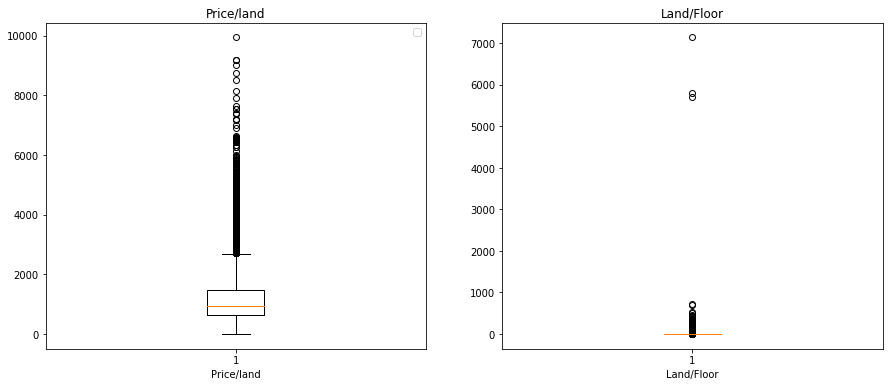

In [130]:
dum_df = df.loc[(df["CBD_DIST"] <= 26000) & (df["YEAR_SOLD"] >= 2013), :]
fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].boxplot(dum_df["Price/land"])
ax[0].set_xlabel('Price/land')
ax[0].set_title('Price/land')
ax[0].legend()

ax[1].boxplot(dum_df["Land/Floor"])
ax[1].set_xlabel('Land/Floor')
ax[1].set_title('Land/Floor')
# ax[1].plot([min_value,max_value], [min_value,max_value], color = "black")
plt.show()

## Identifying Outlier and drop unwanted data
---

(array([   22.,    17.,    22.,    41.,    32.,    36.,    52.,    85.,
           86.,    74.,   115.,   133.,   143.,   141.,   242.,   271.,
          362.,   615.,  1178.,  1947.,  3050.,  3901.,  4843., 10904.]),
 array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017, 2018, 2019]),
 <a list of 24 Patch objects>)

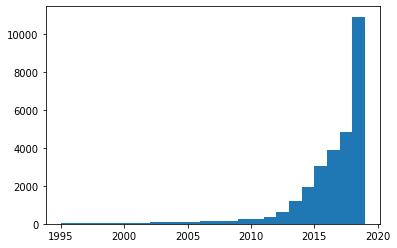

In [131]:
bins = np.arange(1995, 2020, step = 1)
plt.hist(df["YEAR_SOLD"], bins = bins)

In [132]:
# because the property price didnt change much in between 2011 - 2014, 
# therefore also extract data for those years to get as much as data for ML
df = df.loc[(df["YEAR_SOLD"] >= 2011), :].reset_index(drop= True)
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD,Price/land,Land/Floor
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,2018.0,9.0,941.666667,3.750000
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2019.0,2.0,1039.886040,2.525180
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,2015.0,6.0,399.165508,8.360465
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,2018.0,7.0,391.705069,11.033898
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,2016.0,11.0,697.424893,3.557252


In [133]:
# identify outliers from each suburb and take out the unwanted data
ls_suburb = list(df["SUBURB"].unique())
ls_landArea = []
boxplot_dic = {}
ls_outlier = []
dum_ls = []
outlier = {}
ls_less_850 = []


for suburb in ls_suburb:
    ls_landArea = df.loc[(df["SUBURB"] == suburb) & (df["CBD_DIST"] <= 26000), "Price/land"]
    boxplot_dic[suburb] = ls_landArea
    # calculating interquartile range by using quantile function
    # can also use st.iqr to get the interquartile range
    q1, q3 = ls_landArea.quantile([0.25,0.75])
    upper = q3 + 1.5*st.iqr(ls_landArea) # whiskers = 1.5 by default
    lower = q1 - 1.5*st.iqr(ls_landArea)
    # np.logical_or to compare two different lists (many to many)
    ls_outlier = ls_landArea[np.logical_or(ls_landArea.values < lower, ls_landArea.values > upper)]
    dum = ls_outlier[np.logical_or(ls_outlier.values <= 800, ls_outlier.values >= 5500)]
    dum_pd = pd.Series(dum).index
    # putting all the results into dictionary
    outlier[suburb + str(" outlier")] = ls_outlier
    # ls_less_850[suburb] = dum
    ls_less_850.append(dum_pd)

outlier


{'South Lake outlier': 605        81.168831
 5240     1171.497585
 5739     1159.909910
 11748     268.059973
 14226    1235.795455
 14838     197.730496
 19249    1171.662125
 23828    2623.853211
 29117     243.455497
 Name: Price/land, dtype: float64,
 'Wandi outlier': Series([], Name: Price/land, dtype: float64),
 'Camillo outlier': 3848     1072.727273
 19319    2864.077670
 19435     786.516854
 21998     920.689655
 22661    1185.661765
 26325    1032.608696
 30691    2161.290323
 Name: Price/land, dtype: float64,
 'Bellevue outlier': 6046     1022.727273
 7231       20.985064
 10296    1013.071895
 13606    1521.951220
 14057     186.046512
 19172    1579.831933
 22068     174.418605
 25936     134.154930
 Name: Price/land, dtype: float64,
 'Lockridge outlier': 20839    1423.487544
 30840    1357.466063
 Name: Price/land, dtype: float64,
 'Mount Richon outlier': Series([], Name: Price/land, dtype: float64),
 'Hilbert outlier': Series([], Name: Price/land, dtype: float64),
 'Wai

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

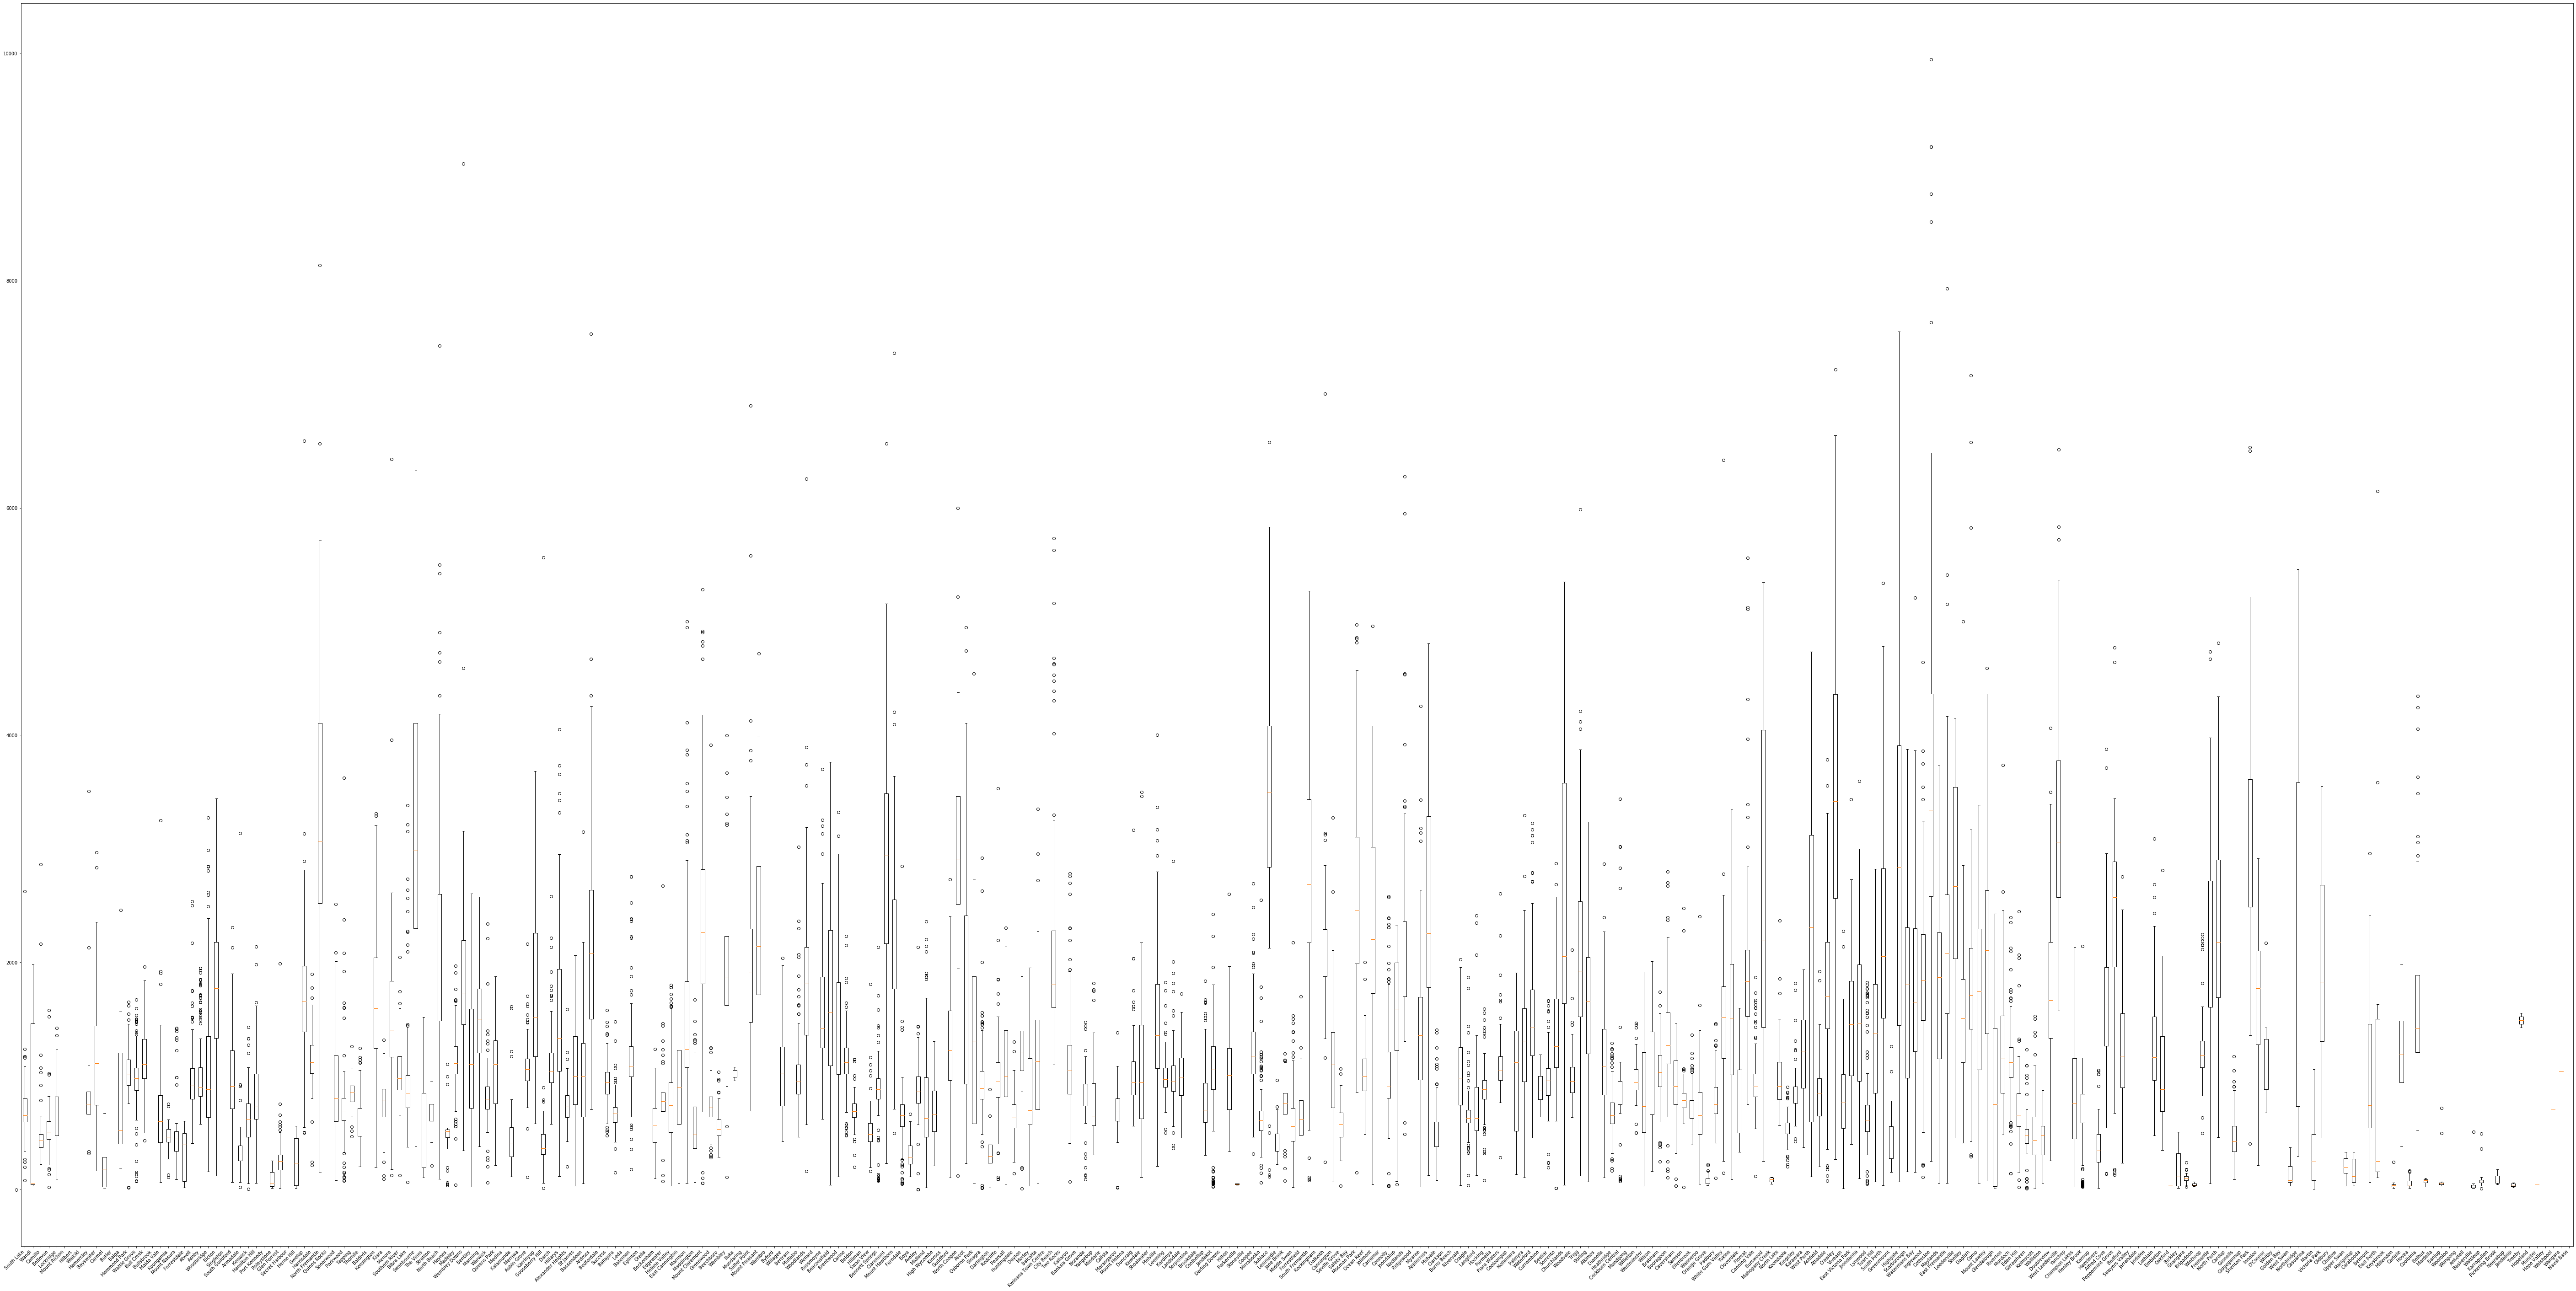

In [134]:
plt.figure(figsize= (100,50))
plt.boxplot(boxplot_dic.values(), labels= ls_suburb)
plt.xticks(rotation=45, ha='right')

In [135]:
index_ls = []
for array in ls_less_850:
    for index in array:
        index_ls.append(index)
len(index_ls)

432

In [141]:
df_outlier_rm = df.drop(index = index_ls).reset_index(drop = True)
df_outlier_rm.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD,Price/land,Land/Floor
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,2018.0,9.0,941.666667,3.750000
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2019.0,2.0,1039.886040,2.525180
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,2015.0,6.0,399.165508,8.360465
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,2018.0,7.0,391.705069,11.033898
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,2016.0,11.0,697.424893,3.557252


## Adding columns or information to improve performance in ML

In [142]:
# Finding appartment/unit from address using regex -> adding a column for 0/1
# regex used (example): "1A |1/1 |1/1A "
df_outlier_rm["APPARTMENT/UNITS"] = (df_outlier_rm["ADDRESS"].str.contains(r"^\d{1,}[A-Z,a-z] |^\d{1,}\/\d{1,} |^\d{1,}\/\d{1,}[A-Z,a-z] ")).astype(int)
df_outlier_rm.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD,Price/land,Land/Floor,APPARTMENT/UNITS
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,2018.0,9.0,941.666667,3.750000,0
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2019.0,2.0,1039.886040,2.525180,0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,2015.0,6.0,399.165508,8.360465,0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,2018.0,7.0,391.705069,11.033898,0
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,2016.0,11.0,697.424893,3.557252,0


In [143]:
df_outlier_rm["APPARTMENT/UNITS"].sum()

3469

## calculate distance to coast line
---

In [113]:
import json
from geopy.distance import distance

In [115]:
# import coastline geojson
with open("../Dataset/Coastline.geojson", "r") as f:
    json_file = json.load(f)

json_file = json_file["features"][0]["geometry"]["coordinates"]

coastline = [] # create an empty list for calculation
# arrange the lat and long in the list and put it as a tuple in coastline list for calcualtion
for coordinate in json_file:
    lat = coordinate[1]
    lng = coordinate[0]
    coastline.append(tuple([lat,lng])) 

len(coastline)

224

In [116]:
coast_distance = []
counter = 0
for coastline_coordinate in coastline:
    for index, row in df_outlier_rm.iterrows():
        if counter == 0:
            current_dis = float(1000000000)
        else:
            current_dis = coast_distance[index]  # saving the values in the list
        house_coordinate = tuple([row["LATITUDE"],row["LONGITUDE"]])
        # calculate the distance from coast
        dum_dis = distance(coastline_coordinate, house_coordinate).m
        # if  dum_dis smaller than current dis
        if counter == 0:
            coast_distance.append(dum_dis)
        elif dum_dis < current_dis:
            coast_distance[index] = dum_dis # put the distance into coast_distance list
    counter += 1

coast_distance

[7553.802465532839,
 7994.792381670372,
 21643.94143732693,
 26743.430605079146,
 18311.330256738387,
 23652.80359920544,
 20112.456743705094,
 2085.638196064569,
 6733.690817295737,
 14374.818256311077,
 31854.083374212958,
 1568.727414535678,
 8970.664410675343,
 7446.305873716047,
 21907.973431734485,
 10238.816292230013,
 31519.54911210135,
 25219.516716094142,
 27125.48667884404,
 24155.66738595522,
 16289.838473260004,
 9559.061750647907,
 18931.97403056619,
 7305.273817425752,
 22666.671483676735,
 2980.5027913946574,
 899.9905482597743,
 21906.91045980784,
 22985.24425881358,
 22083.178821069418,
 22741.61913189462,
 2877.7395423110247,
 1277.0128372217227,
 29257.996703450863,
 33394.58477681948,
 1453.1768010256053,
 25649.162847300322,
 4292.0033279672125,
 14608.935335715227,
 394.64508646702694,
 1432.6827763723568,
 24779.063299701484,
 1578.5631024968827,
 14818.884418960255,
 1984.020743111142,
 7900.496785296768,
 17683.51954226758,
 6803.149158591982,
 12122.066666105

In [138]:
# puting coast distance into a new column 
df_outlier_rm["COAST_DIST"] = coast_distance
# calculate property age
df_outlier_rm["PROPERTY_AGE"] = df_outlier_rm["YEAR_SOLD"] - df_outlier_rm["BUILD_YEAR"]
# drop unwanted column
df_outlier_rm = df_outlier_rm.drop(columns= ["ADDRESS","BEDROOMS", "BATHROOMS", "GARAGE", 'NEAREST_STN', 'POSTCODE','LATITUDE', 'LONGITUDE',
                                             'NEAREST_SCH', 'NEAREST_SCH_RANK', 'MONTH_SOLD', 'Price/land', "BUILD_YEAR", "Land/Floor"])

df_outlier_rm.head()

,SUBURB,PRICE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,YEAR_SOLD,COAST_DIST,PROPERTY_AGE
0,South Lake,565000,600,160,18300,1800,0.828339,2018.0,7553.802466,15.0
1,Wandi,365000,351,139,26900,4900,5.524324,2019.0,7994.792382,6.0
2,Camillo,287000,719,86,22600,1900,1.649178,2015.0,21643.941437,36.0
3,Bellevue,255000,651,59,17900,3600,1.571401,2018.0,26743.430605,65.0
4,Lockridge,325000,466,131,11200,2000,1.514922,2016.0,18311.330257,18.0


In [139]:
# output file
df_outlier_rm.to_csv("./output/Perth_housing_ML.csv", index= False)